In [2]:
#add dependencies
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

#create variable to hold path for csv file
hac = "Resources/HappinessAlcoholConsumption.csv"
whr = "Resources/world-happiness-report-2021.csv"

#read csv file and store in pd frame
hac_read = pd.read_csv(hac)
# hac_read.head()
whr_read = pd.read_csv(whr)
# whr_read.head()

In [3]:
# rename country column
renamed_hac = hac_read.rename(columns={"Country":"Country name"})
renamed_hac.head()

,Country name,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [4]:
# Merge data frames
merge_df = pd.merge(renamed_hac, whr_read, on="Country name", how="inner")
merge_df.head()

,Country name,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Regional indicator,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,Western Europe,...,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,Western Europe,...,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,Western Europe,...,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,Western Europe,...,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,Western Europe,...,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [5]:
# clean data frames for analysis
clean_data = merge_df[["Country name", "Region", "HappinessScore", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita", "Explained by: Log GDP per capita", "Perceptions of corruption", "Explained by: Social support", "Explained by: Freedom to make life choices"]]
clean_data.head()                       

,Country name,Region,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Explained by: Log GDP per capita,Perceptions of corruption,Explained by: Social support,Explained by: Freedom to make life choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691


In [6]:
# rename cloumns
group_df = clean_data.rename(columns={"Country name":"Country", 
                                   "HappinessScore":"Happiness Score", 
                                   "Beer_PerCapita": "Beer (Per Capita)", 
                                   "Spirit_PerCapita": "Spirit (Per Capita)",
                                   "Wine_PerCapita": "Wine (Per Capita)",
                                   "Explained by: Log GDP per capita": "GDP (Per Capita)",
                                   "Perceptions of corruption": "Perceptions of Corruption",
                                   "Explained by: Social support": "Social Support",
                                   "Explained by: Freedom to make life choices": "Life Choices"})
group_df.head()

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691


In [7]:
group_df.dtypes

Country                       object
Region                        object
Happiness Score              float64
Beer (Per Capita)              int64
Spirit (Per Capita)            int64
Wine (Per Capita)              int64
GDP (Per Capita)             float64
Perceptions of Corruption    float64
Social Support               float64
Life Choices                 float64
dtype: object

In [8]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    111 non-null    object 
 1   Region                     111 non-null    object 
 2   Happiness Score            111 non-null    float64
 3   Beer (Per Capita)          111 non-null    int64  
 4   Spirit (Per Capita)        111 non-null    int64  
 5   Wine (Per Capita)          111 non-null    int64  
 6   GDP (Per Capita)           111 non-null    float64
 7   Perceptions of Corruption  111 non-null    float64
 8   Social Support             111 non-null    float64
 9   Life Choices               111 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 9.5+ KB


In [9]:
group_df.describe()

,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,5.575901,139.405405,97.702703,70.801802,1.042748,0.723297,0.837730,0.516207
std,1.138702,105.705455,79.714672,90.901827,0.388376,0.190145,0.249245,0.128776
min,3.303000,1.000000,1.000000,1.000000,0.113000,0.082000,0.058000,0.175000
25%,4.645000,42.000000,28.000000,4.000000,0.843500,0.658000,0.696000,0.435500
50%,5.546000,127.000000,87.000000,18.000000,1.099000,0.799000,0.899000,0.536000
75%,6.516500,227.500000,140.000000,123.500000,1.372500,0.847500,1.043000,0.619500
max,7.526000,376.000000,373.000000,370.000000,1.751000,0.939000,1.172000,0.716000


In [10]:
# export df as csv file
group_df.to_csv("Resources/group_df.csv", index=False, header=True) 

In [11]:
#sorting based on happiness index
happiness_sort_df = group_df.sort_values("Happiness Score", ascending = False)
happiness_sort_df.head()

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691


In [12]:
# top 10 data frame
top_df = happiness_sort_df.nlargest(10, "Happiness Score")
top_df

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691
5,Canada,North America,7.404,240,122,100,1.447,0.415,1.044,0.648
6,Netherlands,Western Europe,7.339,251,88,190,1.501,0.338,1.079,0.647
7,New Zealand,Australia and New Zealand,7.334,203,79,175,1.400,0.242,1.094,0.665
8,Australia,Australia and New Zealand,7.313,261,72,212,1.453,0.442,1.076,0.647
9,Sweden,Western Europe,7.291,152,60,186,1.478,0.237,1.062,0.685


In [13]:
# Bottom 10 data frame
bottom_df = happiness_sort_df.nsmallest(10, "Happiness Score")
sort_bottom_df = bottom_df.sort_values("Happiness Score", ascending = False)
sort_bottom_df

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
101,Comoros,Sub-Saharan Africa,3.956,1,3,1,0.488,0.781,0.367,0.202
102,Cambodia,Southeastern Asia,3.907,57,65,1,0.603,0.843,0.680,0.702
103,Niger,Sub-Saharan Africa,3.856,3,2,1,0.162,0.693,0.402,0.516
104,Chad,Sub-Saharan Africa,3.763,15,1,1,0.255,0.807,0.353,0.240
105,Burkina Faso,Sub-Saharan Africa,3.739,25,7,7,0.364,0.748,0.472,0.381
106,Madagascar,Sub-Saharan Africa,3.695,26,15,4,0.266,0.803,0.503,0.207
107,Tanzania,Sub-Saharan Africa,3.666,36,6,1,0.433,0.577,0.540,0.549
108,Liberia,Sub-Saharan Africa,3.622,19,152,2,0.228,0.850,0.580,0.430
109,Benin,Sub-Saharan Africa,3.484,34,4,13,0.507,0.661,0.058,0.457
110,Togo,Sub-Saharan Africa,3.303,36,2,19,0.254,0.772,0.239,0.289


In [14]:
top_bottom_df = pd.merge(top_df, sort_bottom_df, how = "outer")
top_bottom_df

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691
5,Canada,North America,7.404,240,122,100,1.447,0.415,1.044,0.648
6,Netherlands,Western Europe,7.339,251,88,190,1.501,0.338,1.079,0.647
7,New Zealand,Australia and New Zealand,7.334,203,79,175,1.400,0.242,1.094,0.665
8,Australia,Australia and New Zealand,7.313,261,72,212,1.453,0.442,1.076,0.647
9,Sweden,Western Europe,7.291,152,60,186,1.478,0.237,1.062,0.685


<function matplotlib.pyplot.show(close=None, block=None)>

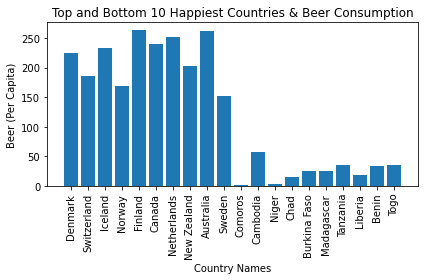

In [81]:
# line plot of countries and thier drinking ber per capita
plt.bar(top_bottom_df["Country"], top_bottom_df["Beer (Per Capita)"])
plt.title("Top and Bottom 10 Happiest Countries & Beer Consumption")
plt.xlabel("Country Names")
plt.ylabel("Beer (Per Capita)")
plt.xticks(rotation = 90)
plt.tight_layout()

plt.savefig("Figures/t_b_10_beer.png")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

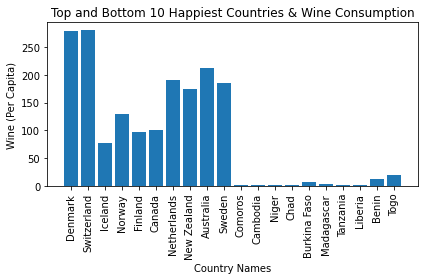

In [80]:
# line plot of countries and thier drinking ber per capita
plt.bar(top_bottom_df["Country"], top_bottom_df["Wine (Per Capita)"])
plt.title("Top and Bottom 10 Happiest Countries & Wine Consumption")
plt.xlabel("Country Names")
plt.ylabel("Wine (Per Capita)")
plt.xticks(rotation = 90)
plt.savefig("Figures/t_b_10_wine.png")
plt.tight_layout()


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

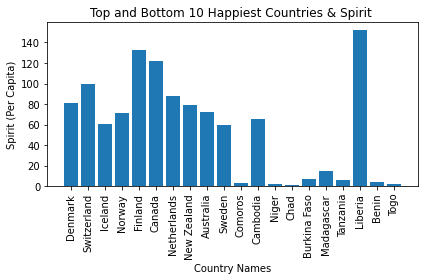

In [79]:
# line plot of countries and thier drinking ber per capita
plt.bar(top_bottom_df["Country"], top_bottom_df["Spirit (Per Capita)"])
plt.title("Top and Bottom 10 Happiest Countries & Spirit ")
plt.xlabel("Country Names")
plt.ylabel("Spirit (Per Capita)")
plt.xticks(rotation = 90)
plt.tight_layout()

plt.savefig("Figures/t_b_10_spirit.png")

plt.show

In [ ]:
#make new df for group bar
goup_df

<function matplotlib.pyplot.show(close=None, block=None)>

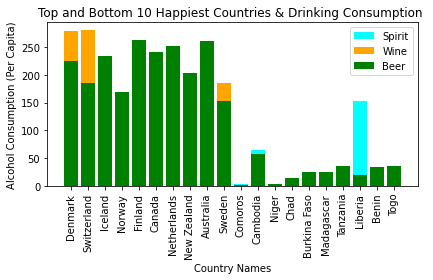

In [78]:
#Combine all 3 alcohols
plt.bar(top_bottom_df["Country"], top_bottom_df["Spirit (Per Capita)"], color = "cyan")
plt.bar(top_bottom_df["Country"], top_bottom_df["Wine (Per Capita)"], color = "orange")
plt.bar(top_bottom_df["Country"], top_bottom_df["Beer (Per Capita)"], color = "green")
plt.title("Top and Bottom 10 Happiest Countries & Drinking Consumption ")
plt.xlabel("Country Names")
plt.ylabel("Alcohol Consumption (Per Capita)")
plt.xticks(rotation = 90)
plt.legend(["Spirit", "Wine", "Beer"])
plt.tight_layout()

plt.savefig("Figures/t_b_10_all.png")

plt.show

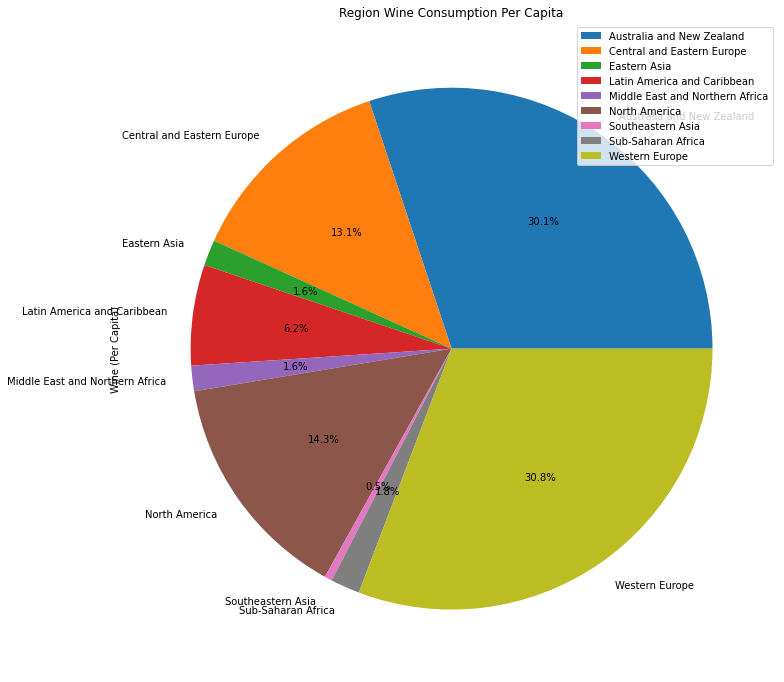

In [39]:
#create pie chart for wine consumption by region
group_df.groupby(["Region"]).mean().plot(kind = "pie", y = "Wine (Per Capita)", autopct='%1.1f%%',figsize=(15,12) )
plt.title("Region Wine Consumption Per Capita")
plt.savefig("Figures/Region_wine.png")


<ipython-input-65-6cf717b95c6c>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel("")


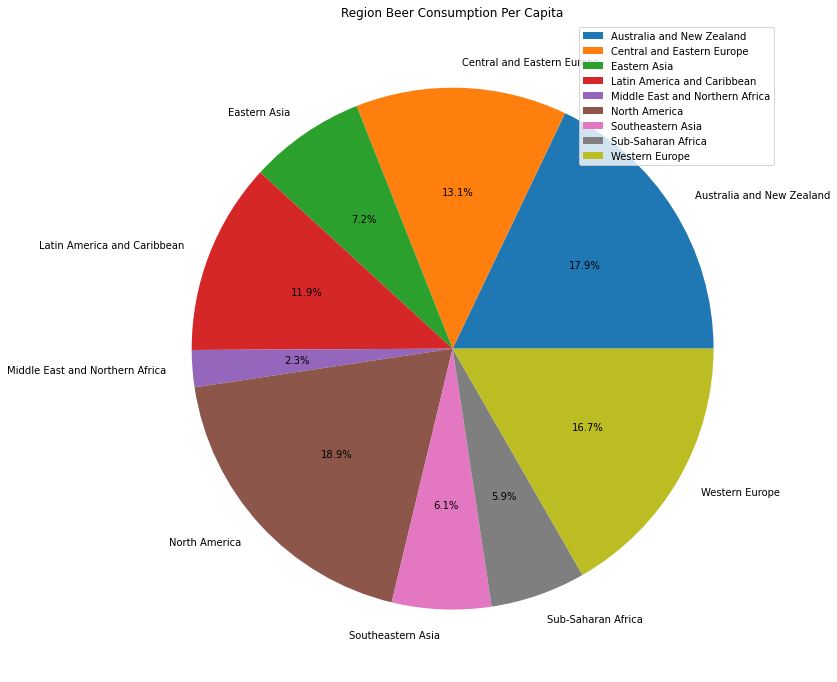

In [65]:
#create pie chart for beer consumption by region
group_df.groupby(["Region"]).mean().plot(kind = "pie", y = "Beer (Per Capita)", autopct='%1.1f%%',figsize=(15,12) )
plt.title("Region Beer Consumption Per Capita")
plt.axes().set_ylabel("")
plt.savefig("Figures/Region_beer.png")

<ipython-input-59-21e7cb36423b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel("")


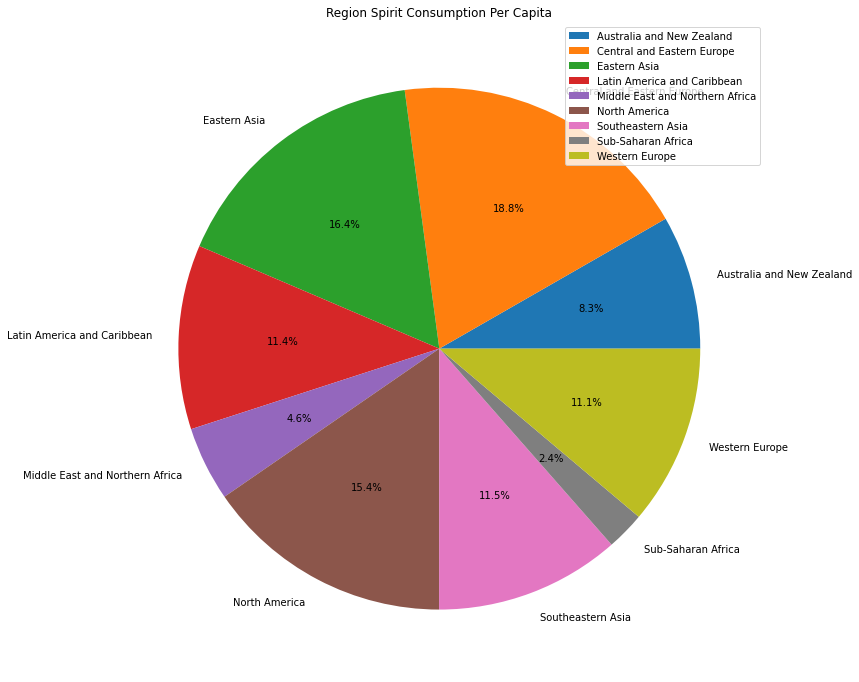

In [59]:
#create pie chart for spirit consumption by region
group_df.groupby(["Region"]).mean().plot(kind = "pie", y = "Spirit (Per Capita)", autopct='%1.1f%%',figsize=(15,12) )
plt.title("Region Spirit Consumption Per Capita")
plt.axes().set_ylabel("")
plt.legend
plt.savefig("Figures/Region_Spirit.png")